In [1]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
import os


In [2]:
# read 5000000 rowa and the viewing few as head
train =  pd.read_csv('train.csv',nrows= 500000,parse_dates=["pickup_datetime"])

train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
train.columns.values

array(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'], dtype=object)

In [4]:
#The pickup_datetime has been casted to a datetime dtype as we have parsed it in the beginning
train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [5]:
#Now checking for missing data
train.isnull().sum()


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

In [6]:
train=train.dropna()

In [7]:
#Calulation of trip distance in miles using the heverasine formula

def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [8]:
# Creating a lambda function and saving it to a column

train['trip_distance']=train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],row['pickup_longitude'],row['dropoff_longitude']),axis=1)

In [9]:
# this is done so so the fare amount is not a non-positive number and to set a minimum value

train = train[train['fare_amount'] >= 2.5]
    
# The lattitute cannot be zero so it sets a condition
train = train[train['pickup_latitude']!= 0]
train = train[train['pickup_longitude'] != 0]
train = train[train['dropoff_latitude'] != 0]
train = train[train['dropoff_longitude'] != 0]

# Cordinates should be bounded between -90 and +90
train = train[(train['pickup_latitude']<=90) & (train['pickup_latitude']>=-90)]
train = train[(train['pickup_longitude']<=90) & (train['pickup_longitude']>=-90)]
train = train[(train['dropoff_latitude']<=90) & (train['dropoff_latitude']>=-90)]
train = train[(train['dropoff_longitude']<=90) & (train['dropoff_longitude']>=-90)]
    

train = train[(train['pickup_latitude'] != train['dropoff_latitude']) & (train['pickup_longitude'] != train['dropoff_longitude'])]

In [10]:
# now to display the new rows

train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.242218
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2.353281
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,0.966733
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2.582073
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,0.778722
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,1.770676


Text(0.5, 1.0, 'Outlier Identification')

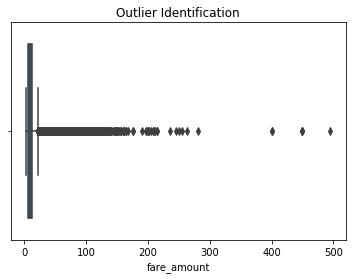

In [11]:
%matplotlib inline
sns.boxplot(train['fare_amount'])

plt.title('Outlier Identification')

In [12]:
#Filtering out the rows

train = train[(train['fare_amount'] >= 2.5) & (train['fare_amount'] <= 800) ]

In [13]:
#Calculating the mean, standard deviation and filtering the rows

mean = np.mean(train['fare_amount'])
sd = np.std(train['fare_amount'])    
train = train[(train['fare_amount'] > mean - 3*sd) & (train['fare_amount'] < mean + 3*sd)]

Text(0.5, 1.0, 'Fare after filtering outliers')

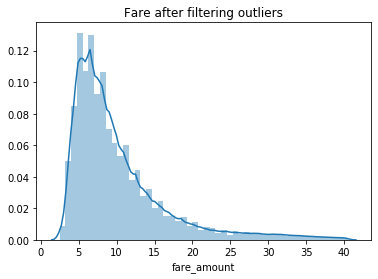

In [14]:
#plotting fare amount

sns.distplot(train['fare_amount'])

plt.title('Fare after filtering outliers')

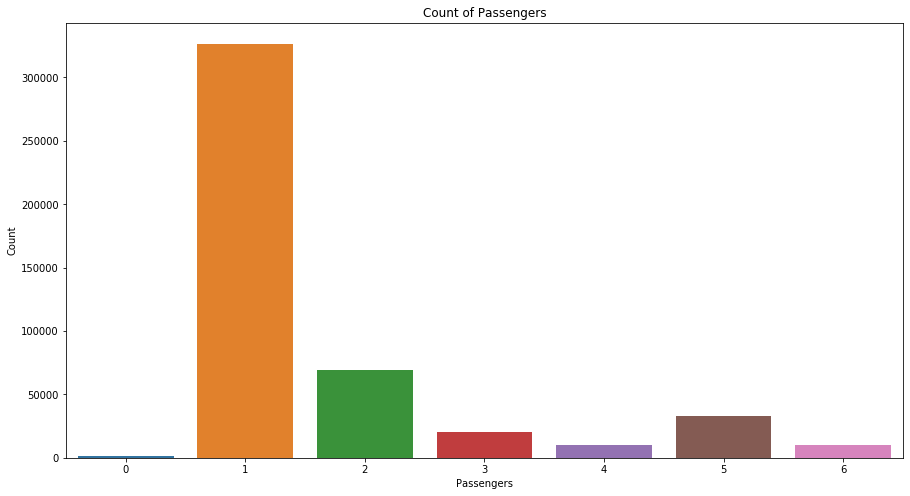

In [15]:
#checking the passenger distribution
passenger_count = train.groupby(['passenger_count']).count()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(passenger_count.index, passenger_count['key'])

plt.xlabel('Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

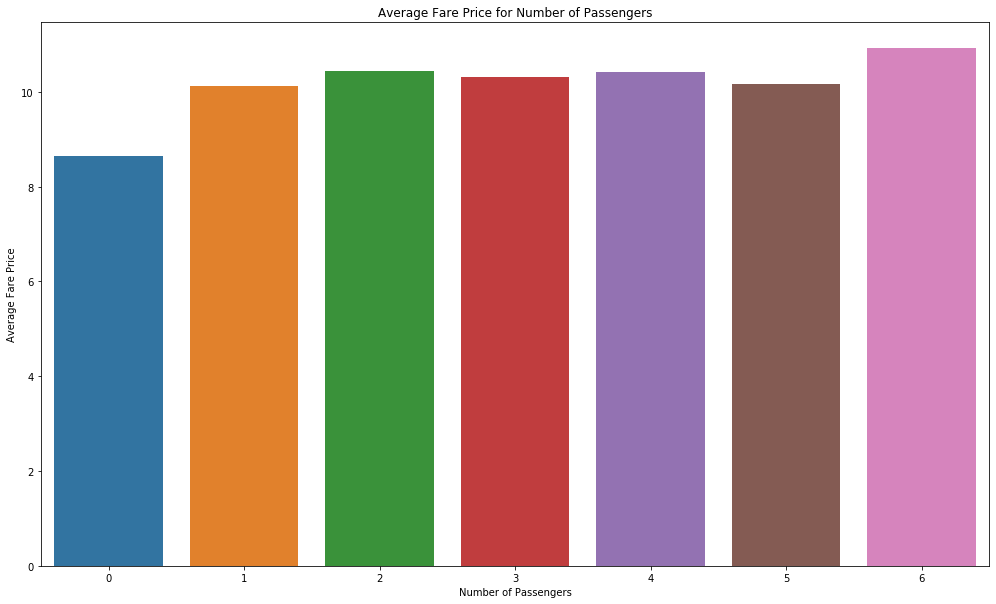

In [16]:
passenger_fare = train.groupby(['passenger_count']).mean()

fig, ax = plt.subplots(figsize=(17,10))

sns.barplot(passenger_fare.index, passenger_fare['fare_amount'])
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [17]:
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression 
from  sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
#adding an intercept (beta_0) to our model

X = train.drop(['fare_amount','key', 'pickup_datetime'],axis = 1)
y = train['fare_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

/Users/ashwinjohnchempolil/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          3.62e-134
Time:                        23:12:10   Log-Likelihood:            -1.5467e+06
No. Observations:              471737   AIC:                         3.093e+06
Df Residuals:                  471730   BIC:                         3.093e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.7962      0.743      7.800      0.000       4.340       7.253
pickup_longitude     -0.0627      0.017     -3.685      0.000      -0.096      -0.029
pickup_latitude       0.0051      0.039      0.132      0.895      -0.071       0.082
dropoff_longitude    -0.0818      0.016     -4.993      0.000      -0.114      -0.050
dropoff_latitude     -0.1630      0.040     -4.066      0.000      -0.241      -0.084
passenger_count       0.0761      0.007     10.629      0.000       0.062       0.090
trip_distance         0.0058      0.000     21.350      0.000       0.005       0.006
==============================================================================
Omnibus:                   180139.116   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           657899.949
Skew:                           1.944   Prob(JB):                         0.00
Kurtosis:                       7.285   Cond. No.                     9.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
print (X_train.shape, y_train.shape)


(377389, 7) (377389,)


In [20]:
print (X_test.shape, y_test.shape)

(94348, 7) (94348,)


In [21]:
lmr = LinearRegression()
lmr.fit(X_train,y_train)
print(lmr.score(X_train,y_train))

0.0015068013921807344


In [22]:
print(lmr.score(X_test,y_test))

0.0005830356934500847


In [23]:
y_pred = lmr.predict(X_test)
lrmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
lrmse

6.435539924876773

In [24]:
print ('Score:', lmr.fit(X_train,y_train).score(X_test, y_test))

Score: 0.0005830356934500847


In [25]:
#Now performing in Random Forest

from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor(random_state=42)
randomf.fit(X_train, y_train)

/Users/ashwinjohnchempolil/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [26]:
#Now doing gradient boosting regression

from sklearn.ensemble import GradientBoostingRegressor
model_gradient= GradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=3, random_state=0)
gradientBoost = model_gradient.fit(X_train, y_train)
predicted = model_gradient.predict(X_test)
grmse = np.sqrt(metrics.mean_squared_error(predicted, y_test))
grmse


2.808460575744264

In [27]:
regression = pd.DataFrame({"regression": ['Multi Linear Regression','Random Forest',  'Gradient Boosting Regrssion'], 
                           "rmse": [lrmse,randomForestMSE,grmse]},columns = ['regression','rmse'])

NameError: name 'randomForestMSE' is not defined

In [ ]:
regression = regression.sort_values(by='rmse', ascending = False)

In [ ]:
sns.barplot(regression['rmse'], regression['regression'], palette = 'Set2')
plt.xlabel("RMSE")
plt.ylabel('Type of Regression Model')
plt.title('Performance Evaluation of different Regressions')

In [ ]:
#Thus we see that Multi Linear regression has the nighest RMSE error of the three